In [1]:
import pandas as pd  # import pandas library
import matplotlib.pyplot as plt # import matplotlib for visualization & graphing

cinema = "cinemaTicket_Ref.csv"  # assumes file is in same directory as this notebook

cinema_df = pd.read_csv(cinema)  # saving dataset into a Pandas DataFrame

print(cinema_df)  # double checking to ensure everything looks good

        film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
0            1492          304      3900000            26            0   
1            1492          352      3360000            42            0   
2            1492          489      2560000            32            0   
3            1492          429      1200000            12            0   
4            1492          524      1200000            15            0   
...           ...          ...          ...           ...          ...   
142519       1569          495      1320000            22            0   
142520       1569          474      1200000            15            0   
142521       1569          524      1060000             8            0   
142522       1569          529       600000             5            0   
142523       1569          486       250000             5            0   

        show_time  occu_perc  ticket_price  ticket_use    capacity  \
0               4       4.26      150000.

In [2]:
cinema_df.describe(include = "O") # looks at non-numerical variables / object

,date
count,142524
unique,234
top,2018-05-15
freq,790


In [3]:
cinema_df.show_time.unique() # checking to see how many unique values there are
# there are 51 unique show times

array([ 4,  5,  1,  3,  2,  6,  7,  8, 14,  9, 12, 10, 15, 16, 13, 11, 17,
       19, 18, 22, 26, 24, 20, 21, 27, 38, 28, 40, 29, 23, 25, 30, 31, 32,
       33, 35, 36, 44, 52, 46, 43, 39, 42, 48, 50, 47, 60, 34, 45, 37, 41],
      dtype=int64)

Text(0, 0.5, 'total sales')

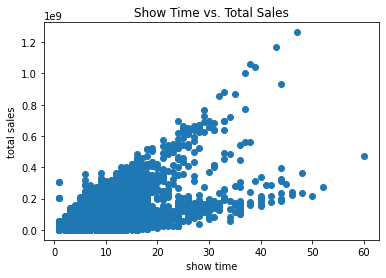

In [4]:
# Plotting show_time vs. total_sales for visualization
plt.scatter(cinema_df["show_time"], cinema_df["total_sales"])
plt.title("Show Time vs. Total Sales")
plt.xlabel("show time")
plt.ylabel("total sales")
# Unfortunately the show_time feature doesn't indicate what unit of value it is, so I do not know what time the movies aired. 
# Looking at the graph below, it appears that the majority of total sales occurred during the smaller numbers of show times.
# The higher the show time also shows the higher number of total sales, but the frequency is much less compared to the 
# majority of show times with smaller numbers as indicated earlier.

Preprocessing data. Next steps:
- Drop features that are unnecessary or irrelevant to the eventual linear regression model that I am attempting to build.
- Identify and remove features with missing rows.
- Create new features for the dataset.

In [5]:
# Drop tickets_out, ticket_sold, film_code, cinema_code, occu_perc; we could have done
# this one line, but separated here for writing out code to view easier
#cinema_df = cinema_df.drop(["show_time"], axis = 1)
cinema_df = cinema_df.drop(["tickets_out"], axis = 1)
cinema_df = cinema_df.drop(["tickets_sold"], axis =1)
cinema_df = cinema_df.drop(["film_code"], axis = 1)
cinema_df = cinema_df.drop(["cinema_code"], axis = 1)
cinema_df = cinema_df.drop(["occu_perc"], axis = 1)

In [6]:
"""
In this for loop, I am identifying which columns contains
rows with missing values. The output should show that there
is 1 column/feature from this dataset with missing
values: capacity.
"""
for column_name in cinema_df.columns:
    if cinema_df[column_name].isnull().values.any() == True:  # if this is True, then there is a missing value
        print(column_name)

capacity


In [7]:
# Removing missing values in row by filtering it out
cinema_df = cinema_df[cinema_df["capacity"].isnull() == False]

In [8]:
"""
Adding 1st new feature, day_of_week, to determine what day of the week 
shows higher or lower balances. This will help determine what days 
had higher ticket sales as well as tickets sold. 
"""
def get_day_of_week(x):  # creating lambda function for the day of the week
    from datetime import datetime
    y = datetime.strptime(x, "%Y-%m-%d")
    return datetime.strftime(y, "%A")

cinema_df['day_of_week'] = cinema_df['date'].apply(lambda x: get_day_of_week(x))


In [9]:
"""
Adding 2nd feature, season, to help determine when total sales and tickets sold
to help with prediction of generating more revenue.
"""
def check_season(date_string):  # creating a lambda function to determine season based on dates in 2018
    if date_string < "2018-03-20":
        return "Winter"
    elif date_string < "2018-06-21":
        return "Spring"
    elif date_string < "2018-09-22":
        return "Summer"
    else:
        return "Fall"
    
cinema_df['season'] = cinema_df["date"].apply(lambda x: check_season(x))

Identifying which columns/features have strongest features that most influence the target variable/column, which is the "total_sales" column. Identify features with most influence numerical output target of "total_sales". These are the columns which I believe are strong features to the target variable:
- show_time
- ticket_price
- capacity
- quarter
- day_of_week
- season

In [10]:
# These are all the features, created in a subset of the cinema_df DataFrame, called X.
# Need to convert "show_time" & "quarter" into categorical because the numbers in show time & quarter 
# are not meant to be quantitative.
cinema_df["show_time"] = cinema_df["show_time"].astype(str)
cinema_df["quarter"] = cinema_df["quarter"].astype(str)

X = cinema_df[["show_time", "ticket_price", "capacity", "quarter", "day_of_week", "season"]]

"""
There are some categorical variables that need to converted into
dummy variables. This is done by using the get_dummies() function
from the Pandas library

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
"""
X = pd.get_dummies(data=X, drop_first=True)
print(X)
# I now have 142,399 rows and 64 columns

        ticket_price    capacity  show_time_10  show_time_11  show_time_12  \
0           150000.0  610.328638             0             0             0   
1            80000.0  519.801980             0             0             0   
2            80000.0  160.000000             0             0             0   
3           100000.0  108.991826             0             0             0   
4            80000.0   89.982004             0             0             0   
...              ...         ...           ...           ...           ...   
142519       60000.0  569.948187             0             0             0   
142520       80000.0   22.999080             0             0             0   
142521      132500.0   86.956522             0             0             0   
142522      120000.0  100.000000             0             0             0   
142523       50000.0  279.329609             0             0             0   

        show_time_13  show_time_14  show_time_15  show_time_16 

In [11]:
# Target has been identified; target variable as total_sales
Y = cinema_df["total_sales"]

In [12]:
# Create a train and test dataset.
# The former will be used to train/build
# the model, while the latter (test dataset) will be used to predict and determine the
# performance of the linear regression model.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)

Build a linear regression model since I am trying to predict and analyze a
numerical output. In this case, that numerical output is the "total_sales" column. Begin by initializing the model object needed for this linear regression, which is the LinearRegression object from scikit-learn.

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression(normalize = True, n_jobs = 5)
lin_reg_model.fit(X_train, y_train)  # fit the model using our training dataset subset

LinearRegression(n_jobs=5, normalize=True)

In [14]:
# Make the model predict!
predictions = lin_reg_model.predict(X_test)
print(predictions)
print(y_test.values)

[16168134.14042104  7944126.42917404  1378491.2045135  ...
 28055547.66131549 10159623.40078743 20783816.17569381]
[11650000  2240000    60000 ... 10500000  7000000  3600000]


In [15]:
print(y_test.values, predictions) # printing the test values and predictions

[11650000  2240000    60000 ... 10500000  7000000  3600000] [16168134.14042104  7944126.42917404  1378491.2045135  ...
 28055547.66131549 10159623.40078743 20783816.17569381]


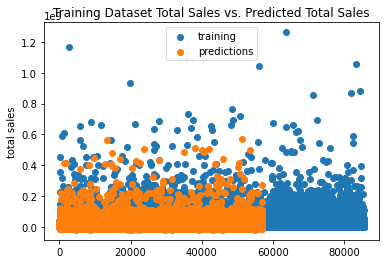

In [16]:
# Plotting graph to visualize training values to see if there any similarities/differences with prediction data,
# and determining if there are any outliers
# https://stackoverflow.com/questions/51726509/python-plot-two-lists-with-different-length

y_train_x = range(0, len(y_train.values))
predictions_x = range(0, len(predictions))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train_x, y_train.values, label = "training")
ax.scatter(predictions_x, predictions, label = "predictions")
plt.legend()
plt.ylabel("total sales")
plt.title("Training Dataset Total Sales vs. Predicted Total Sales")
plt.show()
# no outliers indicated in scatterplot seen with visualization below

After some exhaustive trial and error, I found that seaborn is much more suitable for visualizing regression models than matplotlib, mainly because there is a built-in function in seaborn called regplot. 

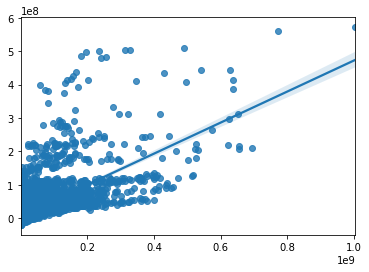

In [23]:
# Plotting a multiple linear regression graph to analyze y_test values & predicted values
import seaborn as sns
import matplotlib.pyplot as plt


sns.regplot(y_test.values, predictions)


#plt.plot(y_test.values, predictions)
#plt.xlim(0,10**9)
#plt.ylim(0,10**9)

# This graph shows that the model is not great. It has a weak relationship with y_test values & predicted values.
# This is also indicated with R squared score shown below in further analysis

Also checking the R-squared values using an Ordinary Least Squares (OLS) model, from the statsmodels package.

> The most common interpretation of r-squared is how well the regression model fits the observed data. For example, an r-squared of 60% reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.

The code below shows that running OLS results in a R-squared is 0.501!

In [18]:
import statsmodels.api as sm # importing statsmodels.api
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()  # ordinary least squares model from the statsmodels package
print(ls.summary()) # shows the OLS results

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1363.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:25:57   Log-Likelihood:            -1.5670e+06
No. Observations:               85439   AIC:                         3.134e+06
Df Residuals:                   85375   BIC:                         3.135e+06
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.644e+

A linear regression model would show that there were several features that yield potentially good predictions of what generates total_sales. Unfortunately I did not have a good model looking at the R-squared value of 50.1%. However, before adding the feature show_time to my model, my previous R-squared value was 25.8%. This indicates that by adding another feature to the model did help to improve the score, but unfortunately the model is still not that great. I will elaborate on this more in my paper.